<a href="https://colab.research.google.com/github/hifistelija/KNN_Exercise/blob/main/01_KNN_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# KNN Project Exercise

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sonar.all-data.csv')

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<ipython-input-4-ccaf83727110>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="viridis")


<Axes: >

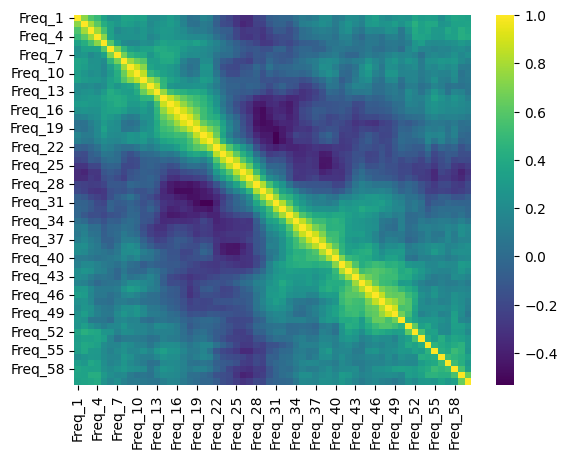

In [ ]:
sns.heatmap(df.corr(), cmap="viridis")

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])

correlation = df.corr()['Label'].drop(["Label"])

top_5_correlated = correlation.abs().sort_values(ascending=False).head(5)
top_5_correlated

Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling
    ('knn', KNeighborsClassifier()) # K-Nearest Neighbors
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [ ]:
param_grid = {
    'knn__n_neighbors': np.arange(1, 30),
    'knn__p': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'knn__p': [1, 2]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'knn__n_neighbors': 1, 'knn__p': 2}

In [ ]:
grid_search.best_score_

0.8453769559032717

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.83997155, 0.84537696, 0.79118065, 0.78065434, 0.79103841,
       0.77524893, 0.75860597, 0.75917496, 0.75391181, 0.75931721,
       0.74295875, 0.74822191, 0.77012802, 0.75945946, 0.7113798 ,
       0.71664296, 0.73798009, 0.7113798 , 0.7113798 , 0.68421053,
       0.71109531, 0.70042674, 0.70056899, 0.68435277, 0.69004267,
       0.68449502, 0.68990043, 0.67908962, 0.73300142, 0.69530583,
       0.71664296, 0.68990043, 0.73812233, 0.7113798 , 0.73812233,
       0.70042674, 0.74893314, 0.72204836, 0.73840683, 0.67908962,
       0.72745377, 0.70071124, 0.72745377, 0.69530583, 0.73826458,
       0.69530583, 0.72233286, 0.68463727, 0.72773826, 0.68477952,
       0.72759602, 0.67923186, 0.72773826, 0.67411095, 0.73314367,
       0.65775249, 0.74921764, 0.6685633 ])

In [ ]:
grid_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'param_knn__p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
pd.DataFrame(grid_search.cv_results_)['mean_test_score']

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

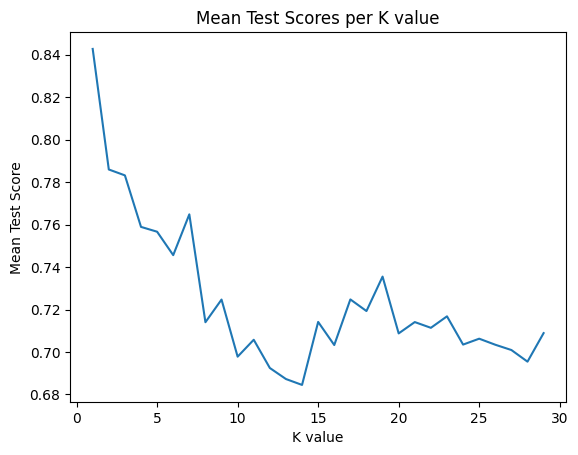

In [ ]:
# Get the mean test scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Get the unique K values that were tested
k_values = [params['knn__n_neighbors'] for params in grid_search.cv_results_['params']]

# Assuming you only changed knn__n_neighbors and knn__p hyperparameters
# You may need to change this line if you have different hyperparameters
unique_k_values = np.unique(k_values)

# Calculate mean score for each K value (across all other hyperparameters)
mean_scores_per_k = [np.mean([mean_test_scores[i] for i in range(len(mean_test_scores)) if k_values[i] == k]) for k in unique_k_values]

plt.plot(unique_k_values, mean_scores_per_k)
plt.title('Mean Test Scores per K value')
plt.xlabel('K value')
plt.ylabel('Mean Test Score')
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_test and y_test are your test data and labels
y_pred = grid_search.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['R', 'M']) # 'R' for Rock, 'M' for Mines

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           R       0.92      0.92      0.92        13
           M       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
conf_matrix

array([[12,  1],
       [ 1,  7]])

### Great Job!